In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyvi.ViTokenizer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV

In [34]:
X_train = pd.read_csv('UIT-VSFC/train/sents.txt', sep='\0', header=None, index_col=None)
y_train = pd.read_csv('UIT-VSFC/train/topics.txt', sep='\0', header=None, index_col=None)

In [35]:
X_dev = pd.read_csv('UIT-VSFC/dev/sents.txt', sep='\0', header=None, index_col=None)
y_dev = pd.read_csv('UIT-VSFC/dev/topics.txt', sep='\0', header=None, index_col=None)

In [36]:
X_test = pd.read_csv('UIT-VSFC/test/sents.txt', sep='\0', header=None, index_col=None)
y_test = pd.read_csv('UIT-VSFC/test/topics.txt', sep='\0', header=None, index_col=None)

In [37]:
y_train_flattened = y_train.values.flatten()
y_dev_flattened = y_dev.values.flatten()
y_test_flattened = y_test.values.flatten()

# Kích thước của dữ liệu trên các tập train, dev và test

In [38]:
print(f'Shape of Training Set:')
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print('=' * 15)
print(f'Shape of Dev Set:')
print(f'X_dev: {X_dev.shape}')
print(f'y_dev: {y_dev.shape}')
print('=' * 15)
print(f'Shape of Test Set:')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

Shape of Training Set:
X_train: (11426, 1)
y_train: (11426, 1)
Shape of Dev Set:
X_dev: (1583, 1)
y_dev: (1583, 1)
Shape of Test Set:
X_test: (3166, 1)
y_test: (3166, 1)


# Phân bố nhãn trên từng tác vụ trên tập train, dev và test. Vẽ biểu đồ barplot thể hiện phân bố nhãn trên tập dữ liệu

In [39]:
train_counts = np.bincount(y_train_flattened)
dev_counts = np.bincount(y_dev_flattened)
test_counts = np.bincount(y_test_flattened)

In [40]:
print('Label Distribution in: ')
print('=' * 15)
print('Training Set')
print(f'Class 0: {train_counts[0]}')
print(f'Class 1: {train_counts[1]}')
print(f'Class 2: {train_counts[2]}')
print(f'Class 3: {train_counts[3]}')
print('=' * 15)
print('Dev Set')
print(f'Class 0: {dev_counts[0]}')
print(f'Class 1: {dev_counts[1]}')
print(f'Class 2: {dev_counts[2]}')
print(f'Class 3: {dev_counts[3]}')
print('=' * 15)
print(f'Class 0: {test_counts[0]}')
print(f'Class 1: {test_counts[1]}')
print(f'Class 2: {test_counts[2]}')
print(f'Class 3: {test_counts[3]}')


Label Distribution in: 
Training Set
Class 0: 8166
Class 1: 2201
Class 2: 497
Class 3: 562
Dev Set
Class 0: 1151
Class 1: 267
Class 2: 70
Class 3: 95
Class 0: 2290
Class 1: 572
Class 2: 145
Class 3: 159


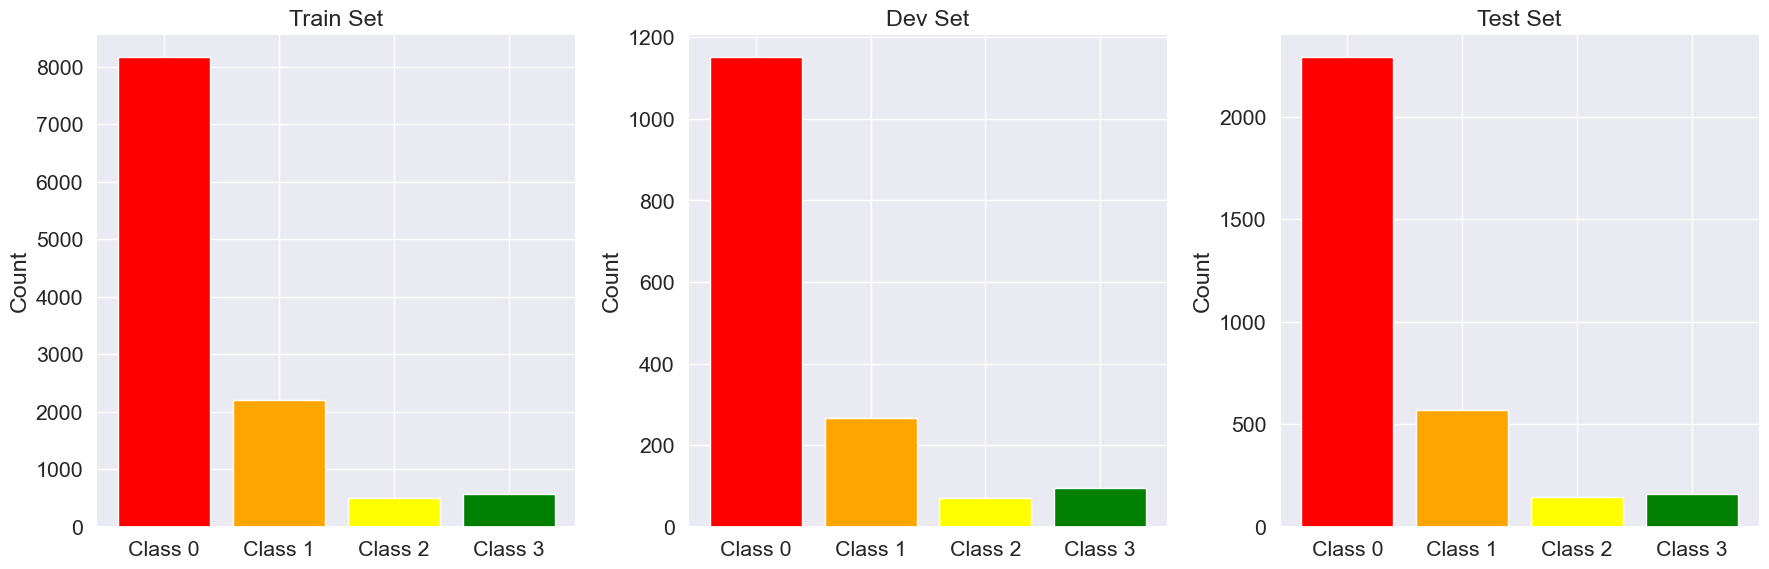

In [41]:
labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].bar(labels, train_counts, color=['red', 'orange', 'yellow', 'green'])
axes[0].set_title('Train Set')
axes[0].set_ylabel('Count')

axes[1].bar(labels, dev_counts, color=['red', 'orange', 'yellow', 'green'])
axes[1].set_title('Dev Set')
axes[1].set_ylabel('Count')

axes[2].bar(labels, test_counts, color=['red', 'orange', 'yellow', 'green'])
axes[2].set_title('Test Set')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

# LR Vs. SVM với CountVectorizer()

In [42]:
cnt_vectorizer = CountVectorizer()
X_train_vec = cnt_vectorizer.fit_transform(X_train[0])
X_dev_vec = cnt_vectorizer.transform(X_dev[0])
X_test_vec = cnt_vectorizer.transform(X_test[0])

In [43]:
lr = LogisticRegression()
svm = SVC()

In [44]:
lr.fit(X_train_vec, y_train_flattened)
svm.fit(X_train_vec, y_train_flattened)

SVC()

In [45]:
y_pred_lr = lr.predict(X_test_vec)
y_pred_svm = svm.predict(X_test_vec)

print('Logistic Regression')
print(f'Accuracy: {accuracy_score(y_test_flattened, y_pred_lr)}')
print(f'Precision: {precision_score(y_test_flattened, y_pred_lr, average='macro')}')
print(f'Recall: {recall_score(y_test_flattened, y_pred_lr, average='macro')}')
print(f'F1-Score: {f1_score(y_test_flattened, y_pred_lr, average='macro')}')
print('=' * 30)
print('SVM')
print(f'Accuracy: {accuracy_score(y_test_flattened, y_pred_svm)}')
print(f'Precision: {precision_score(y_test_flattened, y_pred_svm, average='macro')}')
print(f'Recall: {recall_score(y_test_flattened, y_pred_svm, average='macro')}')
print(f'F1-Score: {f1_score(y_test_flattened, y_pred_svm, average='macro')}')

Logistic Regression
Accuracy: 0.8445988629185092
Precision: 0.747239501346662
Recall: 0.6996723178868542
F1-Score: 0.7207628663525434
SVM
Accuracy: 0.8534428300694883
Precision: 0.814819846982143
Recall: 0.6455077523462031
F1-Score: 0.6959152593660457


In [46]:
lr_confusion_mt = confusion_matrix(y_test_flattened, y_pred_lr)
svm_confusion_mt = confusion_matrix(y_test_flattened, y_pred_svm)

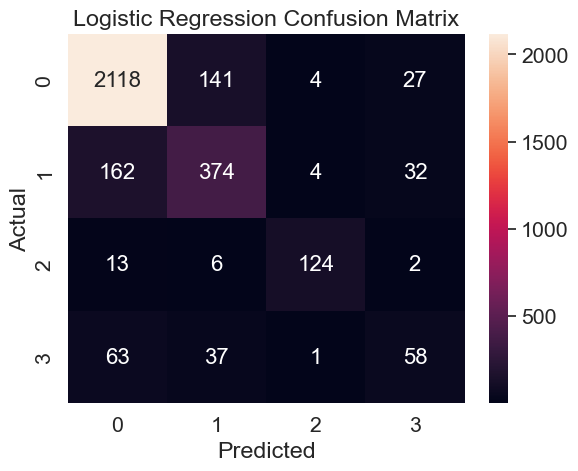

In [47]:
sns.set_theme(font_scale=1.4)
sns.heatmap(lr_confusion_mt, annot=True, annot_kws={'size': 16}, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

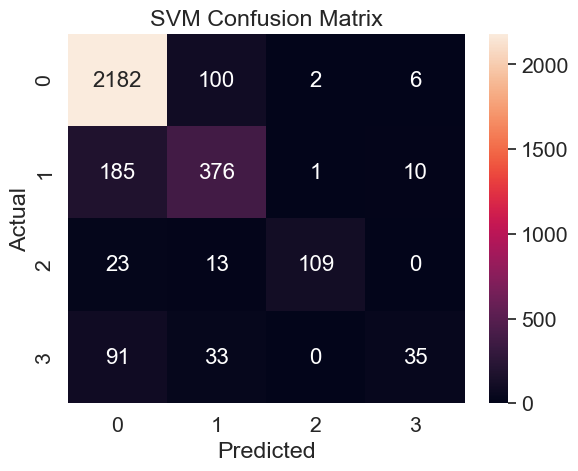

In [48]:
sns.set_theme(font_scale=1.4)
sns.heatmap(svm_confusion_mt, annot=True, annot_kws={'size': 16}, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

# LR Vs. SVM với TfidfVectorizer()

In [49]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train[0])
X_dev_tfidf = tfidf_vectorizer.transform(X_dev[0])
X_test_tfidf = tfidf_vectorizer.transform(X_test[0])

In [50]:
lr_1 = LogisticRegression()
svm_1 = SVC()

In [51]:
lr_1.fit(X_train_tfidf, y_train_flattened)
svm_1.fit(X_train_tfidf, y_train_flattened)

SVC()

In [52]:
y_pred_lr = lr_1.predict(X_test_vec)
y_pred_svm = svm_1.predict(X_test_vec)

print('Logistic Regression')
print(f'Accuracy: {accuracy_score(y_test_flattened, y_pred_lr)}')
print(f'Precision: {precision_score(y_test_flattened, y_pred_lr, average='macro')}')
print(f'Recall: {recall_score(y_test_flattened, y_pred_lr, average='macro')}')
print(f'F1-Score: {f1_score(y_test_flattened, y_pred_lr, average='macro')}')
print('=' * 30)
print('SVM')
print(f'Accuracy: {accuracy_score(y_test_flattened, y_pred_svm)}')
print(f'Precision: {precision_score(y_test_flattened, y_pred_svm, average='macro')}')
print(f'Recall: {recall_score(y_test_flattened, y_pred_svm, average='macro')}')
print(f'F1-Score: {f1_score(y_test_flattened, y_pred_svm, average='macro')}')

Logistic Regression
Accuracy: 0.8531269740998105
Precision: 0.7748941924331558
Recall: 0.6960839680884614
F1-Score: 0.713642603405155
SVM
Accuracy: 0.7286797220467467
Precision: 0.5393448966584722
Recall: 0.27203691710777483
F1-Score: 0.25217493179796696


c:\Users\windown\PycharmProjects\helloWorld\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [53]:
lr_confusion_mt = confusion_matrix(y_test_flattened, y_pred_lr)
svm_confusion_mt = confusion_matrix(y_test_flattened, y_pred_svm)

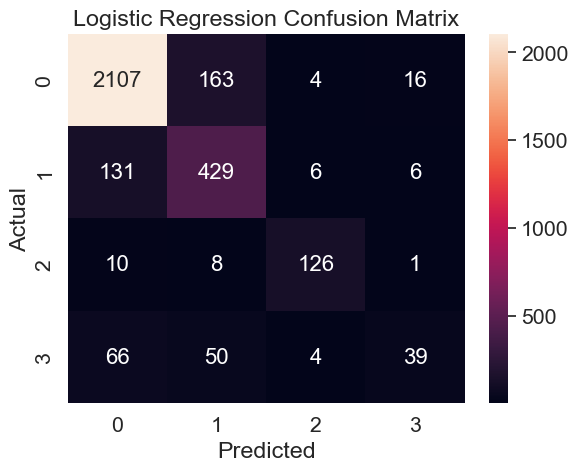

In [54]:
sns.set_theme(font_scale=1.4)
sns.heatmap(lr_confusion_mt, annot=True, annot_kws={'size': 16}, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

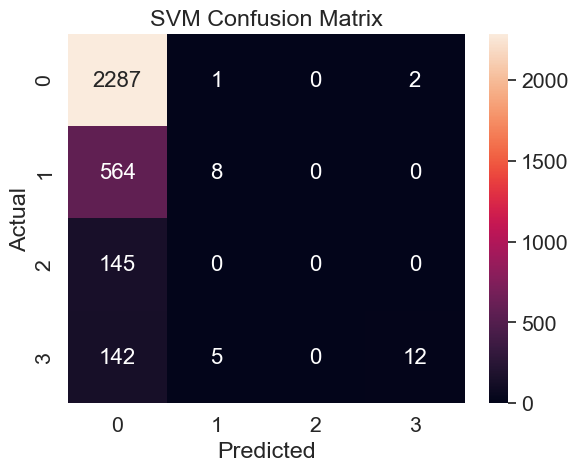

In [55]:
sns.set_theme(font_scale=1.4)
sns.heatmap(svm_confusion_mt, annot=True, annot_kws={'size': 16}, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()